p: The lag order, representing the number of lag observations incorporated in the model.
d: Degree of differencing, denoting the number of times raw observations undergo differencing.
q: Order of moving average, indicating the size of the moving average window.

In [1]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Min Temp

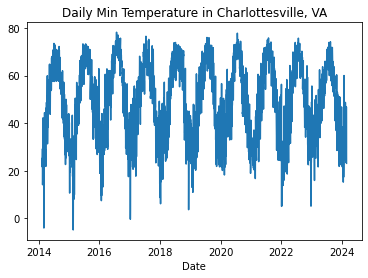

In [3]:
# Plot the time series
plt.plot(data['min_temp'])
plt.title('Daily Min Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

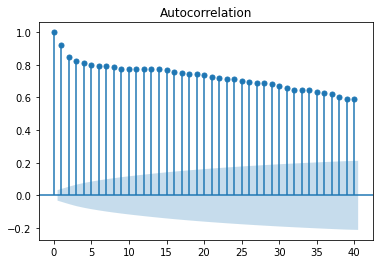

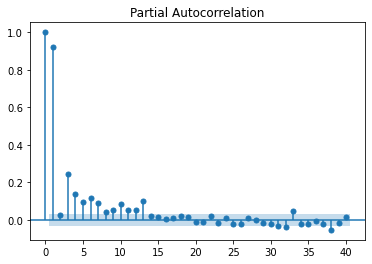

In [4]:
# finding parameters
plot_acf(data['min_temp'], lags=40)
plot_pacf(data['min_temp'], lags=40)
plt.show()

In [5]:
# building the ARIMA model
model = ARIMA(data['min_temp'], order=(2, 0, 0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [6]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


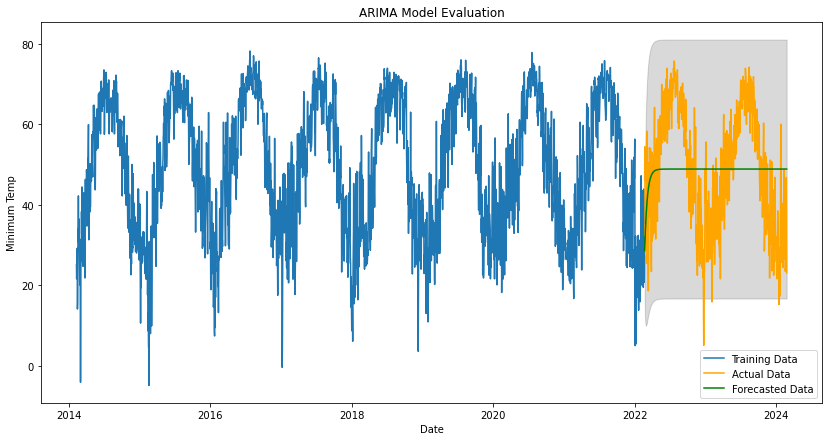

RMSE: 14.79384108870076


In [7]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['min_temp'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
min_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['min_temp'], label='Training Data')
plt.plot(test['min_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Minimum Temp')
plt.legend()
plt.show()

print('RMSE:', min_temp_rmse)

# Mean Temp

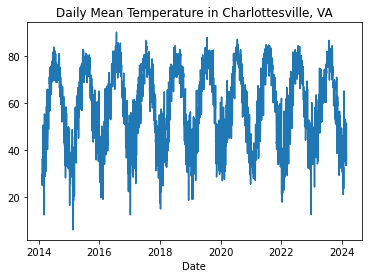

In [8]:
# Plot the time series
plt.plot(data['mean_temp'])
plt.title('Daily Mean Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

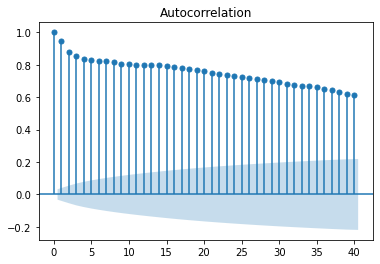

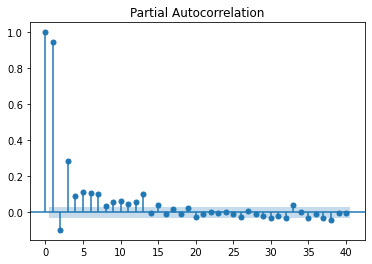

In [9]:
# finding parameters

plot_acf(data['mean_temp'], lags=40)
plot_pacf(data['mean_temp'], lags=40)
plt.show()

In [10]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['mean_temp'], order=(2,0,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [11]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


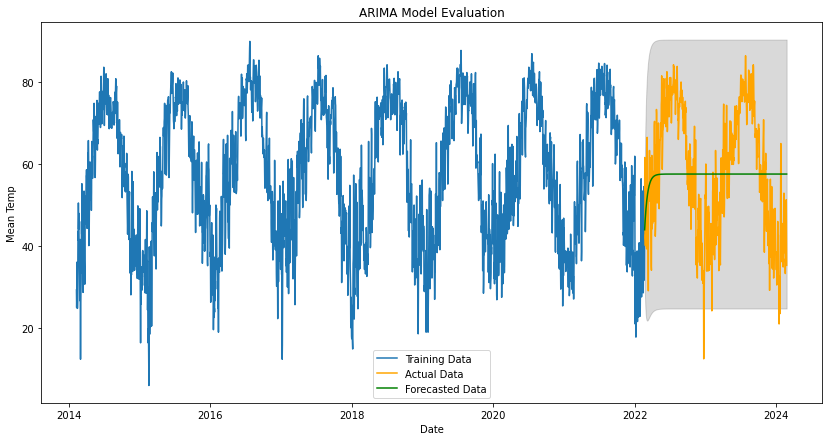

RMSE: 15.290804790618099


In [12]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['mean_temp'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['mean_temp'], test_forecast_series)
mean_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['mean_temp'], label='Training Data')
plt.plot(test['mean_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

print('RMSE:', mean_temp_rmse)

# Max Temp

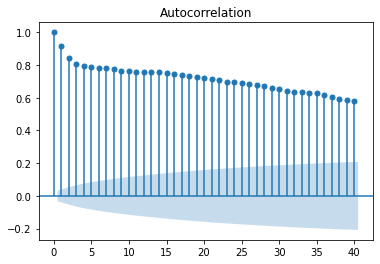

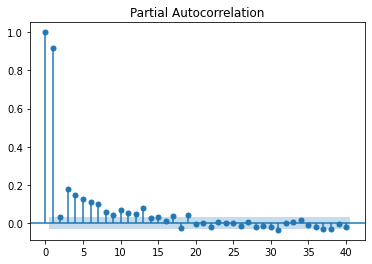

In [13]:
plot_acf(data['max_temp'], lags=40)
plot_pacf(data['max_temp'], lags=40)
plt.show()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/p

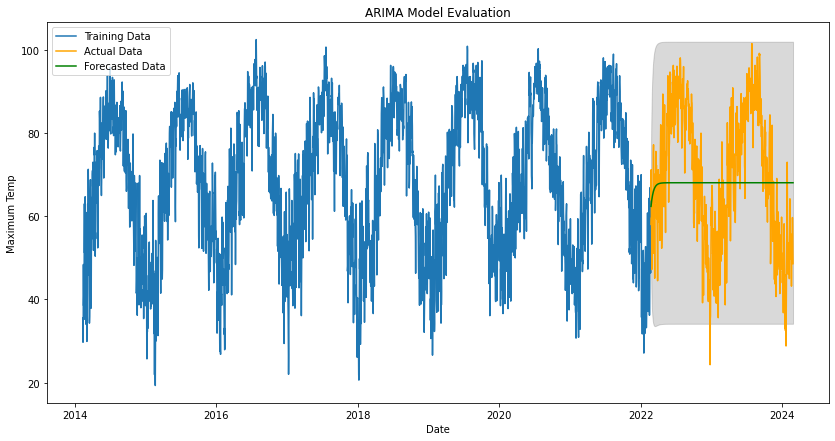

RMSE: 24.309616316486462


In [14]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['max_temp'], order=(2,0,0))
model_fit = model.fit()

# training and forecast
forecast = model_fit.get_forecast(steps=30)

# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['max_temp'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
max_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['max_temp'], label='Training Data')
plt.plot(test['max_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Maximum Temp')
plt.legend()
plt.show()

print('RMSE:', max_temp_rmse)

# Sunrise

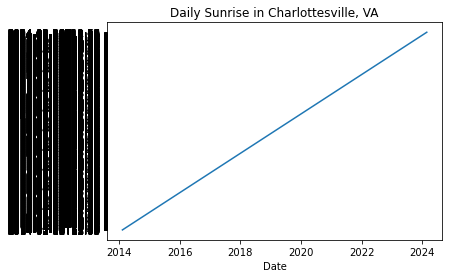

In [15]:
# Plot the time series
plt.plot(data['sunrise'])
plt.title('Daily Sunrise in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

ValueError: could not convert string to float: '2014-02-11T12:08'

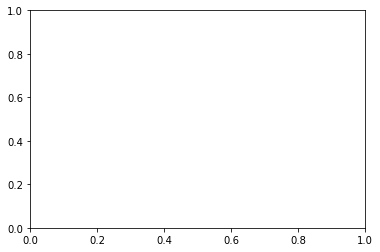

In [17]:
# finding parameters
plot_acf(data['sunrise'], lags=40)
plot_pacf(data['sunrise'], lags=40)
plt.show()

In [ ]:
# building the ARIMA model
model = ARIMA(data['sunrise'], order=(1,0,1))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [44]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


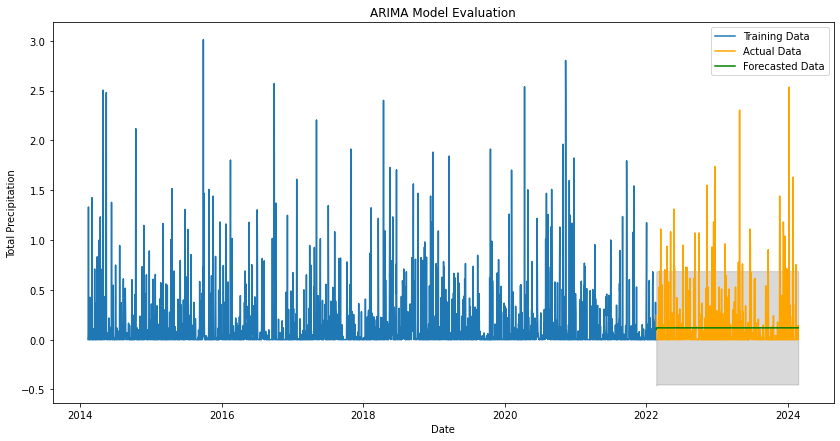

RMSE: 0.26748214073319904


In [45]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
sunrise_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', sunrise_rmse)

# Total Precipitation

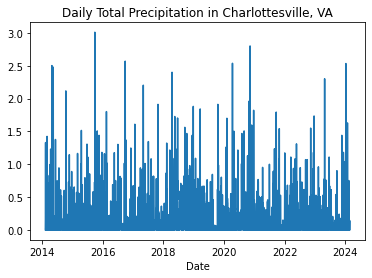

In [18]:
# Plot the time series
plt.plot(data['total_precip'])
plt.title('Daily Total Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

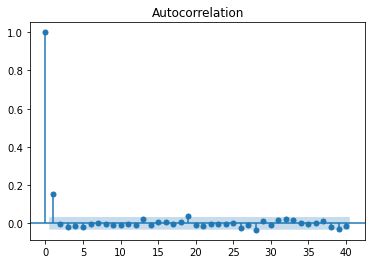

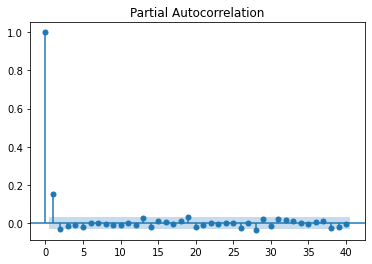

In [19]:
# finding parameters
plot_acf(data['total_precip'], lags=40)
plot_pacf(data['total_precip'], lags=40)
plt.show()

In [20]:
# building the ARIMA model
model = ARIMA(data['total_precip'], order=(2,0,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [21]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


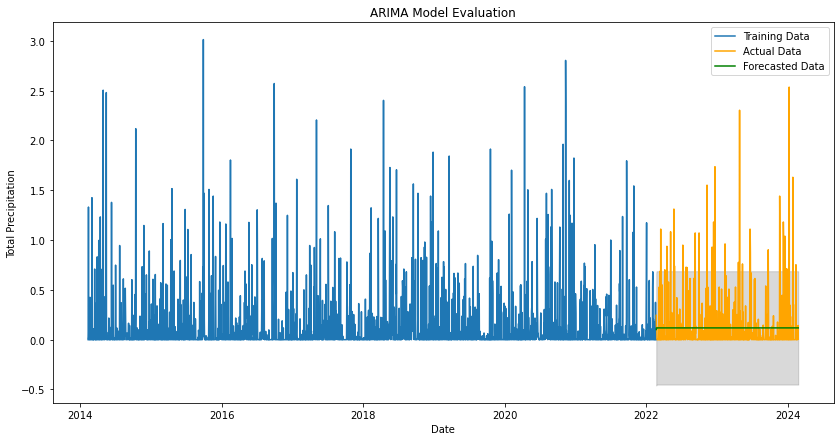

RMSE: 0.2674821225946501


In [22]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
total_precip_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', total_precip_rmse)

# Snow

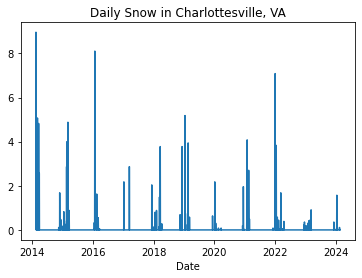

In [23]:
# Plot the time series
plt.plot(data['snow'])
plt.title('Daily Snow in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

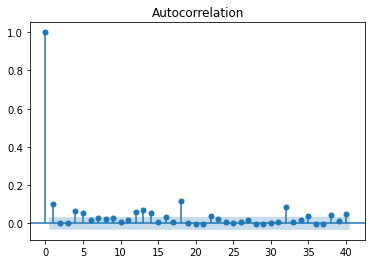

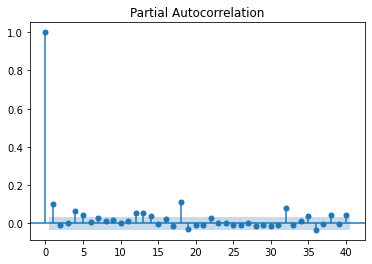

In [24]:
# finding parameters
plot_acf(data['snow'], lags=40)
plot_pacf(data['snow'], lags=40)
plt.show()

In [25]:
# building the ARIMA model
model = ARIMA(data['snow'], order=(1,0,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [26]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


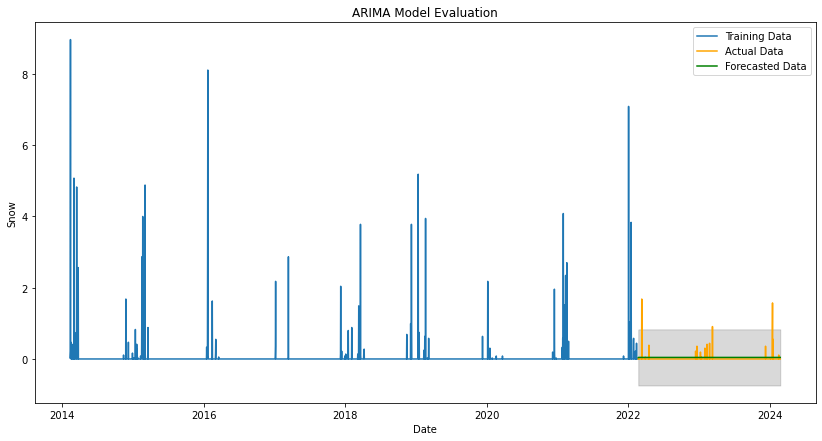

RMSE: 0.11181008255329762


In [27]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['snow'], order=(1, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['snow'], test_forecast_series)
snow_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['snow'], label='Training Data')
plt.plot(test['snow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Snow')
plt.legend()
plt.show()

print('RMSE:', snow_rmse)

# Hours of Precipitation

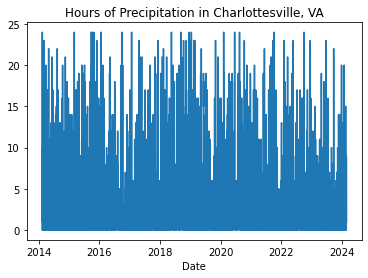

In [28]:
# Plot the time series
plt.plot(data['precip_hours'])
plt.title('Hours of Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

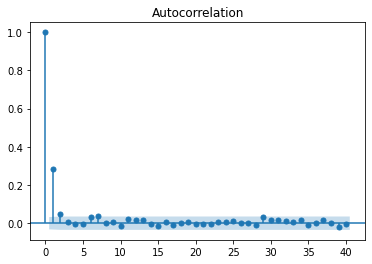

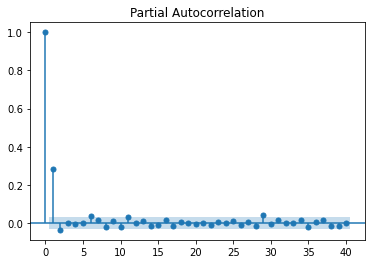

In [29]:
# finding parameters
plot_acf(data['precip_hours'], lags=40)
plot_pacf(data['precip_hours'], lags=40)
plt.show()

In [30]:
# building the ARIMA model
model = ARIMA(data['precip_hours'], order=(2,0,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [31]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


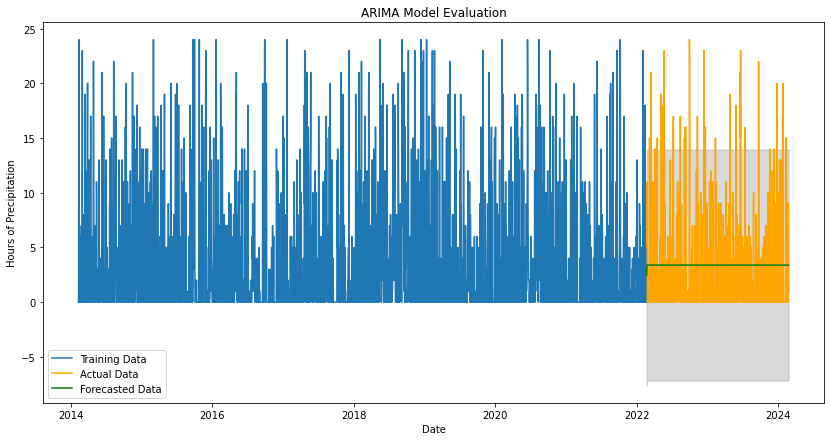

RMSE: 4.582040777279375


In [32]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['precip_hours'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['precip_hours'], test_forecast_series)
precip_hours_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['precip_hours'], label='Training Data')
plt.plot(test['precip_hours'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Precipitation')
plt.legend()
plt.show()

print('RMSE:', precip_hours_rmse)

# Max wind

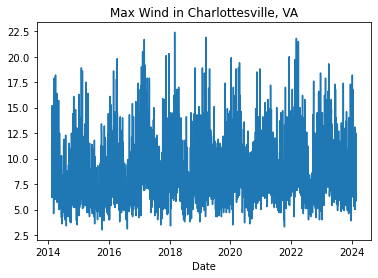

In [33]:
# Plot the time series
plt.plot(data['max_wind'])
plt.title('Max Wind in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

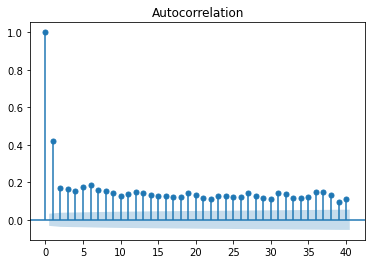

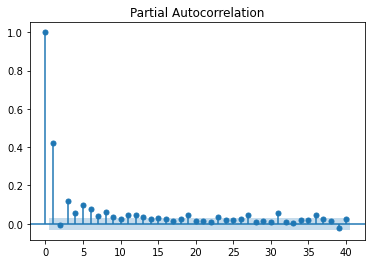

In [34]:
# finding parameters
plot_acf(data['max_wind'], lags=40)
plot_pacf(data['max_wind'], lags=40)
plt.show()

In [35]:
# building the ARIMA model
model = ARIMA(data['max_wind'], order=(2,0,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [36]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


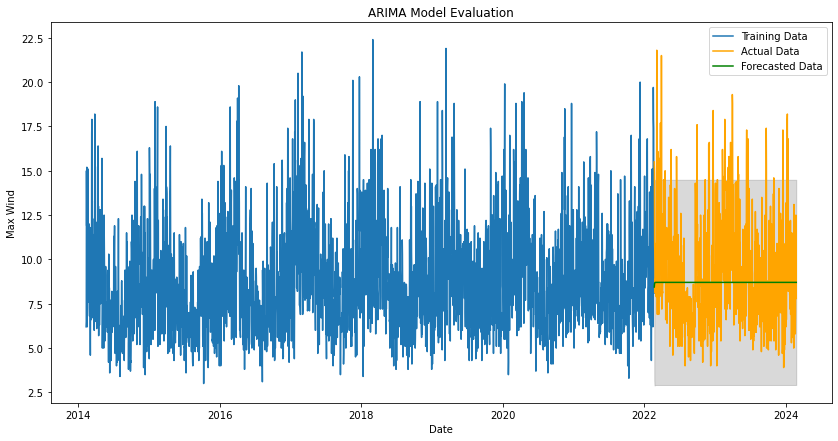

RMSE: 3.0177604628539685


In [37]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['max_wind'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['max_wind'], test_forecast_series)
max_wind_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['max_wind'], label='Training Data')
plt.plot(test['max_wind'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Max Wind')
plt.legend()
plt.show()

print('RMSE:', max_wind_rmse)

# Wind Direction Degrees

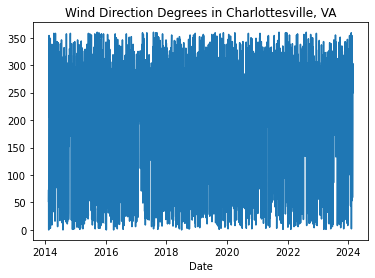

In [38]:
# Plot the time series
plt.plot(data['wind_direction_deg'])
plt.title('Wind Direction Degrees in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

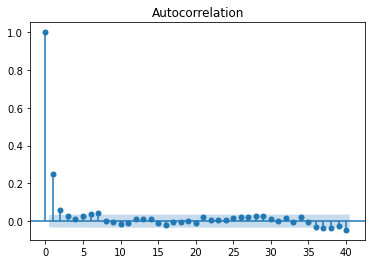

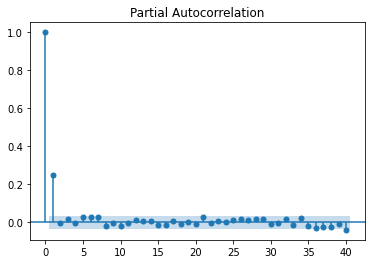

In [39]:
# finding parameters
plot_acf(data['wind_direction_deg'], lags=40)
plot_pacf(data['wind_direction_deg'], lags=40)
plt.show()

In [40]:
# building the ARIMA model
model = ARIMA(data['wind_direction_deg'], order=(2,0,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [41]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


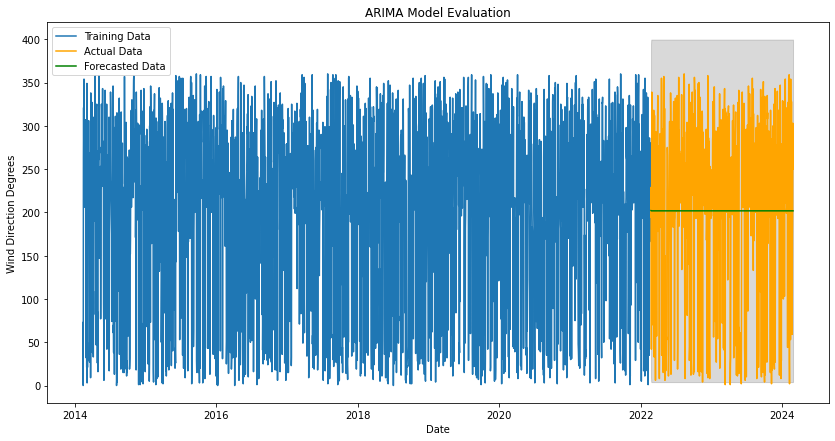

RMSE: 98.17984590450817


In [42]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['wind_direction_deg'], order=(2,0,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['wind_direction_deg'], test_forecast_series)
wind_direction_deg_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['wind_direction_deg'], label='Training Data')
plt.plot(test['wind_direction_deg'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Wind Direction Degrees')
plt.legend()
plt.show()


print('RMSE:', wind_direction_deg_rmse)

In [46]:
final = pd.DataFrame(['snow_rmse',
                'sunrise_rmse',
                'max_temp_rmse',
                'max_wind_rmse',
                'min_temp_rmse',
                'mean_temp_rmse',
                'precip_hours_rmse',
                'total_precip_rmse',
                'wind_direction_deg_rmse'
])

final['RMSE'] = [
snow_rmse,
sunrise_rmse,
max_temp_rmse,
max_wind_rmse,
min_temp_rmse,
mean_temp_rmse,
precip_hours_rmse,
total_precip_rmse,
wind_direction_deg_rmse]

final.columns = ['Variable', 'RMSE']
final.sort_values('RMSE')



,Variable,RMSE
0,snow_rmse,0.111810
7,total_precip_rmse,0.267482
1,sunrise_rmse,0.267482
3,max_wind_rmse,3.017760
6,precip_hours_rmse,4.582041
4,min_temp_rmse,14.793841
5,mean_temp_rmse,15.290805
2,max_temp_rmse,24.309616
8,wind_direction_deg_rmse,98.179846
